# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

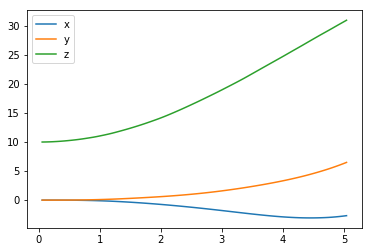

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

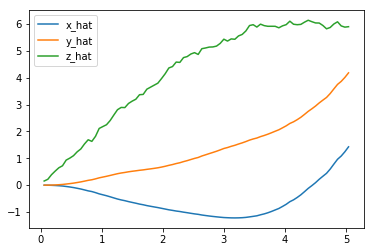

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

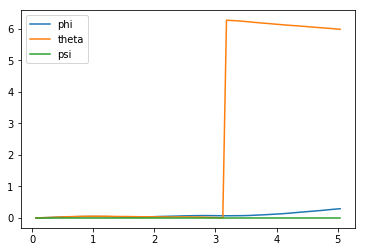

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

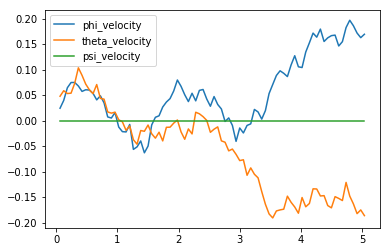

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

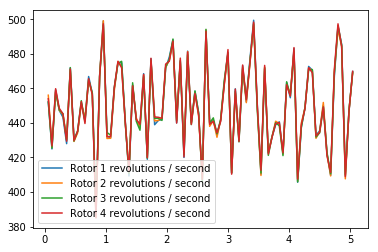

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-2.6804906   6.49516084 30.98417179  0.29214622  5.99010234  0.        ]
[1.42593012 4.17914393 5.8969835 ]
[ 0.16929532 -0.18631863  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 740.921 (best = 754.514), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.

import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import datetime

init_pose = np.array([0., 0., 0., 0., 0., 0.])
init_velocities = np.array([0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])
runtime = 5
target_pos = np.array([0., 0., 100.])

task = Task(init_pose=init_pose, init_velocities=init_velocities,
            init_angle_velocities=init_angle_velocities, runtime=runtime,
            target_pos=target_pos)
agent = DDPG(task)

episode_numbers = 100
all_returns = {
    "messages": [],
    "scores": [],
    "position": {
        "X": [],
        "Y": [],
        "Z": [],
    },
    "angle": {
        "X": [],
        "Y": [],
        "Z": []
    }
}

for i_episode in range(1, episode_numbers + 1):
    state = agent.reset_episode_vars()
    while True:
        action = agent.act(state) 
        next_state, reward, done, final_pose, final_angle_velocities = task.new_step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            message = "\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), position = {:7.3f}, angle = {:7.3f}".format(
                i_episode, agent.score, agent.best_score, final_pose[2], final_angle_velocities.sum())
            print(message, end="")
            all_returns["messages"].append(message)
            all_returns["scores"].append(agent.score)
            all_returns["position"]["X"].append(final_pose[0])
            all_returns["position"]["Y"].append(final_pose[1])
            all_returns["position"]["Z"].append(final_pose[2])
            all_returns["angle"]["X"].append(final_angle_velocities[0])
            all_returns["angle"]["Y"].append(final_angle_velocities[1])
            all_returns["angle"]["Z"].append(final_angle_velocities[2])
            break
    sys.stdout.flush()

log_file = "log.txt"
date_time_now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

file = open(log_file, "a+")
file.write(date_time_now + "\n\r")
for message_log in all_returns["messages"]:
     file.write("    " + message_log + "\n\r")
file.write("\n\r----\n\r\n\r")
file.close()

Using TensorFlow backend.


Episode =  100, score = 1337.822 (best = 1606.037), position = 113.801, angle =   0.932

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

### Score

Scoring chart during the learning of the quadricopter.

### Pontuação

Gráfico com pontuação durante o aprendizado do quadricóptero.

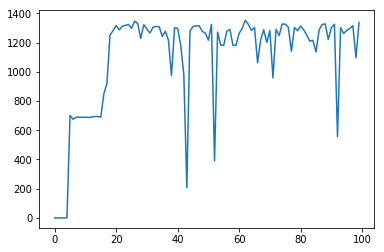

In [11]:
## TODO: Plot the rewards.

plt.plot(all_returns["scores"], label='Score')
_ = plt.ylim()

### Score X Position

Graph with the score and the position in the X, Y and Z axes of the quadricopter during the learning.

### Pontuação X Posição

Gráfico com a pontuação e a posição nos eixos X, Y e Z do quadricóptero durante o aprendizado.

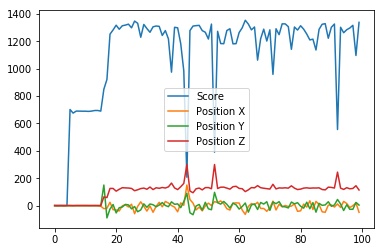

In [12]:
plt.plot(all_returns["scores"], label='Score')
plt.plot(all_returns["position"]["X"], label="Position X")
plt.plot(all_returns["position"]["Y"], label="Position Y")
plt.plot(all_returns["position"]["Z"], label="Position Z")
plt.legend()
_ = plt.ylim()

### Score X Angle/Velocity

Graph with the score and angle/velocity on the X, Y and Z axes of the quadricopter during learning.

### Pontuação X Angulo/Velocidade

Gráfico com a pontuação e o angulo/velocidade nos eixos X, Y e Z do quadricóptero durante o aprendizado.

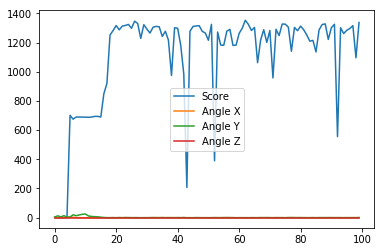

In [13]:
plt.plot(all_returns["scores"], label='Score')
plt.plot(all_returns["angle"]["X"], label="Angle X")
plt.plot(all_returns["angle"]["Y"], label="Angle Y")
plt.plot(all_returns["angle"]["Z"], label="Angle Z")
plt.legend()
_ = plt.ylim()

### Score X Position X Angle/Velocity

Graph with the score, position in the X, Y and Z axes and the angle/velocity in the X, Y and Z axes of the quadricopter during the learning.

### Pontuação X Posição X  Angulo/Velocidade

Gráfico com a pontuação, posição nos eixos X, Y e Z e o angulo/velocidade nos eixos X, Y e Z do quadricóptero nos durante o aprendizado.

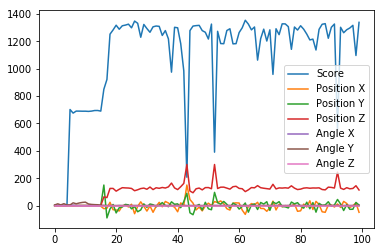

In [14]:
plt.plot(all_returns["scores"], label='Score')
plt.plot(all_returns["position"]["X"], label="Position X")
plt.plot(all_returns["position"]["Y"], label="Position Y")
plt.plot(all_returns["position"]["Z"], label="Position Z")
plt.plot(all_returns["angle"]["X"], label="Angle X")
plt.plot(all_returns["angle"]["Y"], label="Angle Y")
plt.plot(all_returns["angle"]["Z"], label="Angle Z")
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

O método de recompensa que utilizei foi validando duas informações do quadricóptero, que são o *angulo/velocidade* e *posição* atual do quadricóptero nos eixos X, Y e Z.

Foi criado um método dentro do arquivo **task.py** chamado **calcule**, dentro dele é calculado o valor de recompensa que o quadricóptero ira receber com base no *angulo/velocidade* e *posição* nos eixos X, Y e Z.

Este método necessita de três parâmetro, que são, o valor atual da *posição* ou *angulo/velocidade* do quadricóptero, representado pelo parâmetro *current*, o valor da meta, o melhor valor possível para a *posição* ou *angulo/velocidade* do quadricóptero, representado pelo parâmetro *goal* e o intervalo, um valor numérico para checar e calcular o máximo de intervalo dos valores *current* e *goal*, representado pelo parâmetro *interval*.

Primeiro ele realiza uma checagem com o parâmetro *current* e o parâmetro *goal*, para saber se os dois valores são iguais, se forem, encerra o método retornando o valor do *interval* multiplicado por dois, o dobro da pontuação máxima que o método calcula se os valores fossem diferente. Isso significa que a *posição* ou *angulo/velocidade* do quadricóptero esta em seu melhor resultado, dando sua recompensa máxima a ele.

Depois ele ira realizar uma checagem que se o valor de *current* for menor que o resultado de *goal* menos *inteval*, ou *current* for maior que o resultado de *goal* mais *interval*, encerra o método retornando zero. Isso significa que o valor atual *current* é menor ou maior que o intervalo e a meta, então ele esta muito longe da *posição* ou *angulo/velocidade* recomendado, resultando em nenhuma recompensa.

Por ultimo, ele checa o valor de *goal*, se ele for igual a zero, significa que ele vai usar o calculo abaixo referente ao *if* para o *angulo/velocidade*, retornando o calculo de *interval* menos *current* se acaso *current* for maior que *goal*, senão retorna o resultado de *current* mais *interval*. Se acaso *goal* for diferente de zero, ele entrará no *else*, e seguindo a mesma logica, se *current* for maior que *goal* retorna o calculo de *interval* mais *goal*, menos *current*, senão retorna simplesmente o valor de *current*. Esse cálculos acima são para calcular a recompensa em comparação a meta, quanto mais perto da meta, maior é a recompensa, quanto mais longe da meta, menor é a recompensa.

Este método calcula a recompensa utilizando a proximidade do valor atual estiver da meta, quanto mais perto, maior é a recompensa, que é recebida através do valor do intervalo, que é usado para checar o intervalo máximo entre o valor atual e a meta, e também calcular a sua recompensa para aquele momento.

Esse método é usado seis vezes, calculando a recompensa para o *angulo/velocidade* nos eixos X, Y e Z e a *posição* nos eixos X, Y e Z do quadricóptero, com uma multiplicação da recompensa da *posição* no eixo Z por três, significando que esta parte da recompensa é muito importante, após isso soma todos os valores, e esse valor é a recompensa do quadricóptero para aquele momento.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- O algorítimo de aprendizado utilizado foi o *Deep Deterministic Policy Gradients*, ele foi disponibilizado pela Udacity como uma escolha popular, e funcionou muito bem. Foram feitas poucas modificações nele para deixar o melhor possível para a aprendizagem do quadricóptero.


- Poucos valores foram alterados no algorítimo de aprendizado, os valores de $\alpha$, $\gamma$, $\epsilon$ e muitos outros foram mantidos em seu valor *default*, foram alterados o valor de **buffer_size**, que estava com um valor de 100000, e alterado para 1000000, o que foi um grande diferencial para a aprendizagem, quando o valor ainda estava 100000, a aprendizagem erá muito pequena, mas quando alterou para 1000000, ele começou a aprender muito mais rápido e melhor.


- Não foi alterado nenhuma opção como **layers**, **sizes** ou **activation functions**, mas foi adicionado o retorno do **score**, **best_score** e **reward** no algorítimo de aprendizado, esses valores são usados para mostrar o desempenho do algorítimo durante a aprendizagem, para salvar no log e mostrar nos gráficos acima o resultado final da aprendizagem do quadricóptero.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- Em minha concepção, foi uma tarefa nem fácil e nem difícil, mas sim média, um projeto trabalhoso pela quantidade de teste realizados. No começo foi criado vários métodos de recompensa, e testando um por um ate chegar ao melhor método. Depois de algumas analises, reparei que o aprendizado não estava aumentando muito, e simplesmente ele começava a ganhar cada vez menos recompensa depois de um tempo, o que levou a um novo método de recompensa, o descrito na questão 1, e também alterado o algorítimo de aprendizado, na parte da memoria, o **buffer_size**, aumentando seu valor, apos isso o quadricóptero começou a aprender melhor.


- Existe uma curva de aprendizado apos os primeiros episódios, que apos conseguir uma boa taxa de aprendizado, se mantêm ate o final de todos os episódios, com algumas variações na taxa de recompensa. Percebemos que o objetivo do quadricóptero que é decolar e chegar ate a posição 100 no eixo Z, é comprido, pois analisando os gráficos da *posição*, percebe que o quadricóptero se mantêm relativamente perto da posição 100 no eixo Z, e nos demais eixos se mantêm mais próximos ao zero, e também o angulo/velocidade se mantêm muito próximo do zero, como foi definido no método de recompensa.


- Analisando o gráfico abaixo, e a media da recompensa dos 10 últimos episódios, que foi de **1207.7206694394608**, percebemos algumas variações em sua taxa de recompensa, mas que rapidamente volta para o todo do gráfico, repetindo os demais episódios, com uma ótima taxa de aprendizado. A media das recompensas foi relativamente boa, mais poderia ser melhor se não tivesse as variações, que é o principal motivo da media não estar como as recompensas mais altas.

1207.7206694394608


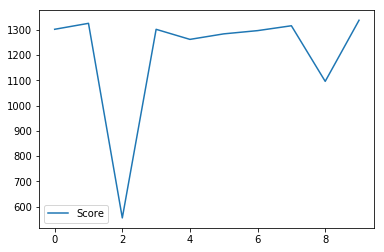

In [15]:
last_10_scores = all_returns["scores"][-10:]

average = sum(last_10_scores) / len(last_10_scores)
print(average)

plt.plot(last_10_scores, label='Score')
plt.legend()
_ = plt.ylim()

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- A parte mais difícil do projeto foi definir a **task**, o método de recompensa para cada episodio de aprendizado,  mas a dificuldade não foi tão grande, mas sim trabalhosa, pois a cada nova mudança nesse método, era preciso iniciar o treinamento novamente. Testar todas as possíveis formas de recompensas que implementei foram ótimas para chegar nesse modelo final.


- Achei este projeto muito bom, foi excelente ver a cada novo episodio, a cada novo método de aprendizado, a cada novo teste, ver o progresso que o quadricóptero teve, com base nos valores e no gráfico que foram apresentados.